In [37]:
import pandas as pd
from sqlalchemy import create_engine

In [16]:
path_to_db = '/datasets/telecomm_csi.db'

In [17]:
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [18]:
query = """
SELECT SUBSTR(tab.user_id, 1) as user_id,
       SUBSTR(tab.lt_day, 1) as lt_day,
       SUBSTR(tab.is_new, 1) as is_new,
       SUBSTR(tab.age, 1) as age,
       SUBSTR(tab.gender_segment, 1) as gender_segment,
       SUBSTR(tab.os_name, 1) as os_name,
       SUBSTR(tab.cpe_type_name, 1) as cpe_type_name,
       SUBSTR(tab.city, 1) as city,
       SUBSTR(tab.age_title, 1) as age_title,
       SUBSTR(tab.traffic_title, 1) as traffic_title,
       SUBSTR(tab.lifetime_title, 1) as lifetime_title,
       SUBSTR(tab.nps_score, 1) as nps_score,
       SUBSTR(tab.nps_group, 1) as nps_group
       
FROM
(SELECT u.user_id as user_id,
       u.lt_day as lt_day,
       CASE
          WHEN u.lt_day <= 365 THEN 'new'
          ELSE 'old'
       END as is_new,
       u.age as age,
       CAST(u.gender_segment as varchar) as gender_segment,
       u.os_name as os_name,
       u.cpe_type_name as cpe_type_name,
       l.country as country,
       l.city as city,
       a.bucket_min,
       a.bucket_max,
       a.title as age_title,
       t.bucket_min,
       t.bucket_max,
       t.title as traffic_title,
       ls.bucket_min,
       ls.bucket_max,
       ls.title as lifetime_title,
       u.nps_score as nps_score,
       CASE 
         WHEN u.nps_score BETWEEN 9 AND 10 THEN 'promoters'
         WHEN u.nps_score BETWEEN 7 AND 8 THEN 'passives'
         ELSE 'detractors'
       END as nps_group
FROM user as u
INNER JOIN location as l on u.location_id = l.location_id
INNER JOIN age_segment as a ON u.age_gr_id = a.age_gr_id
INNER JOIN traffic_segment as t ON u.tr_gr_id = t.tr_gr_id 
INNER JOIN lifetime_segment as ls ON u.lt_gr_id = ls.lt_gr_id) as tab 
"""

In [36]:
query = '''SELECT 
                SUBSTR(title, 4) AS age_segment
           FROM age_segment
        '''

pd.read_sql(query, engine) 

,age_segment
0,до 16
1,16-24
2,25-34
3,35-44
4,45-54
5,55-64
6,66 +
7,n/a


In [19]:
df = pd.read_sql(query, engine) 
df

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,city,age_title,traffic_title,lifetime_title,nps_score,nps_group
0,A001A2,2320,old,45.0,1.0,ANDROID,SMARTPHONE,Уфа,05 45-54,04 1-5,08 36+,10,promoters
1,A001WF,2344,old,53.0,0.0,ANDROID,SMARTPHONE,Киров,05 45-54,04 1-5,08 36+,10,promoters
2,A003Q7,467,old,57.0,0.0,ANDROID,SMARTPHONE,Москва,06 55-64,08 20-25,06 13-24,10,promoters
3,A004TB,4190,old,44.0,1.0,IOS,SMARTPHONE,РостовнаДону,04 35-44,03 0.1-1,08 36+,10,promoters
4,A004XT,1163,old,24.0,0.0,ANDROID,SMARTPHONE,Рязань,02 16-24,05 5-10,08 36+,10,promoters
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,old,54.0,1.0,ANDROID,SMARTPHONE,Москва,05 45-54,04 1-5,08 36+,5,detractors
502489,ZZZLWY,129,new,31.0,0.0,ANDROID,SMARTPHONE,Москва,03 25-34,04 1-5,04 4-6,8,passives
502490,ZZZQ5F,522,old,36.0,0.0,ANDROID,SMARTPHONE,Сургут,04 35-44,09 25-30,06 13-24,10,promoters
502491,ZZZQ8E,2936,old,37.0,1.0,ANDROID,SMARTPHONE,УланУдэ,04 35-44,17 65-70,08 36+,9,promoters


In [20]:
df.to_csv('telecomm.csv', index=False)

In [21]:
df = pd.read_csv('telecomm.csv')
df

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,city,age_title,traffic_title,lifetime_title,nps_score,nps_group
0,A001A2,2320,old,45.0,1.0,ANDROID,SMARTPHONE,Уфа,05 45-54,04 1-5,08 36+,10,promoters
1,A001WF,2344,old,53.0,0.0,ANDROID,SMARTPHONE,Киров,05 45-54,04 1-5,08 36+,10,promoters
2,A003Q7,467,old,57.0,0.0,ANDROID,SMARTPHONE,Москва,06 55-64,08 20-25,06 13-24,10,promoters
3,A004TB,4190,old,44.0,1.0,IOS,SMARTPHONE,РостовнаДону,04 35-44,03 0.1-1,08 36+,10,promoters
4,A004XT,1163,old,24.0,0.0,ANDROID,SMARTPHONE,Рязань,02 16-24,05 5-10,08 36+,10,promoters
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502488,ZZZKLD,1249,old,54.0,1.0,ANDROID,SMARTPHONE,Москва,05 45-54,04 1-5,08 36+,5,detractors
502489,ZZZLWY,129,new,31.0,0.0,ANDROID,SMARTPHONE,Москва,03 25-34,04 1-5,04 4-6,8,passives
502490,ZZZQ5F,522,old,36.0,0.0,ANDROID,SMARTPHONE,Сургут,04 35-44,09 25-30,06 13-24,10,promoters
502491,ZZZQ8E,2936,old,37.0,1.0,ANDROID,SMARTPHONE,УланУдэ,04 35-44,17 65-70,08 36+,9,promoters


### Ссылка на презентацию

https://disk.yandex.ru/d/M66UpsZ4LLGAtA

In [22]:
(df['nps_group'].value_counts()[0] - df['nps_group'].value_counts()[1])/len(df)

0.2189821549752932

traffic_title             01 0  01 0-0.01  02 0.01-0.1  03 0.1-1    04 1-5  \
gender_segment age_title                                                     
0.0            01 до 16    NaN        NaN          NaN       NaN -0.363636   
               02 16-24   1.00   1.000000     0.300000  0.067114  0.147795   
               03 25-34  -0.25   0.473684     0.034335  0.114179  0.091748   
               04 35-44   0.20   0.611111     0.133333  0.175342  0.148309   
               05 45-54   1.00   0.000000     0.200787  0.242283  0.227058   
               06 55-64   1.00   1.000000     0.437500  0.335811  0.325729   
               07 66 +    0.50        NaN     0.523810  0.421239  0.431066   
               08 n/a      NaN        NaN          NaN -0.333333 -0.600000   
1.0            01 до 16    NaN        NaN          NaN  1.000000  0.333333   
               02 16-24    NaN   1.000000     0.533333  0.209459  0.086294   
               03 25-34   0.00   0.437500     0.144860  0.187573  0.122389   
               04 35-44  -0.20   0.105263     0.302222  0.252777  0.212892   
               05 45-54   0.50   0.333333     0.422222  0.311377  0.301068   
               06 55-64    NaN  -0.333333     0.485000  0.417137  0.405618   
               07 66 +    1.00  -0.333333     0.532710  0.554845  0.514910   
               08 n/a      NaN        NaN    -1.000000       NaN  0.666667   

traffic_title              05 5-10  06 10-15  07 15-20  08 20-25  09 25-30  \
gender_segment age_title                                                     
0.0            01 до 16  -0.038462 -0.150000 -0.038462 -0.500000  0.083333   
               02 16-24   0.080182  0.082827  0.070539  0.099912  0.036120   
               03 25-34   0.105374  0.086486  0.072949  0.084164  0.096735   
               04 35-44   0.175698  0.192103  0.198322  0.235945  0.243514   
               05 45-54   0.259818  0.298726  0.369592  0.336842  0.389553   
               06 55-64   0.369189  0.387336  0.401987  0.388375  0.484127   
               07 66 +    0.453846  0.470000  0.492908  0.465517  0.554622   
               08 n/a    -1.000000 -0.400000 -1.000000       NaN -1.000000   
1.0            01 до 16   0.263158  0.142857  0.080000 -0.043478  0.235294   
               02 16-24   0.129104  0.100075  0.084378  0.075623  0.072375   
               03 25-34   0.134840  0.138101  0.117347  0.162374  0.149917   
               04 35-44   0.237662  0.237280  0.248996  0.280173  0.290997   
               05 45-54   0.336581  0.385710  0.385371  0.392658  0.437132   
               06 55-64   0.446405  0.461097  0.529355  0.507310  0.531729   
               07 66 +    0.570674  0.549843  0.513181  0.602667  0.550201   
               08 n/a     1.000000 -1.000000 -1.000000       NaN       NaN   

traffic_title             ...  15 55-60  16 60-65  17 65-70  18 70-75  \
gender_segment age_title  ...                                           
0.0            01 до 16   ... -0.214286  0.062500  0.062500  0.100000   
               02 16-24   ...  0.034234  0.072187 -0.037281 -0.016393   
               03 25-34   ...  0.046923  0.052790  0.073778  0.090264   
               04 35-44   ...  0.267338  0.237960  0.228374  0.280088   
               05 45-54   ...  0.418103  0.427861  0.358491  0.413793   
               06 55-64   ...  0.493151  0.581818  0.361111  0.689655   
               07 66 +    ...  0.777778  0.285714  0.375000  1.000000   
               08 n/a     ...       NaN       NaN       NaN       NaN   
1.0            01 до 16   ... -0.400000  0.214286 -0.250000  0.400000   
               02 16-24   ...  0.026930  0.002392  0.084746 -0.038462   
               03 25-34   ...  0.111401  0.106335  0.103220  0.068104   
               04 35-44   ...  0.318182  0.311724  0.239933  0.309829   
               05 45-54   ...  0.470779  0.389558  0.258242  0.229508   
               06 55-64   ...  0.669065  0.571429  0.444444  0.596154   
               07 66 +

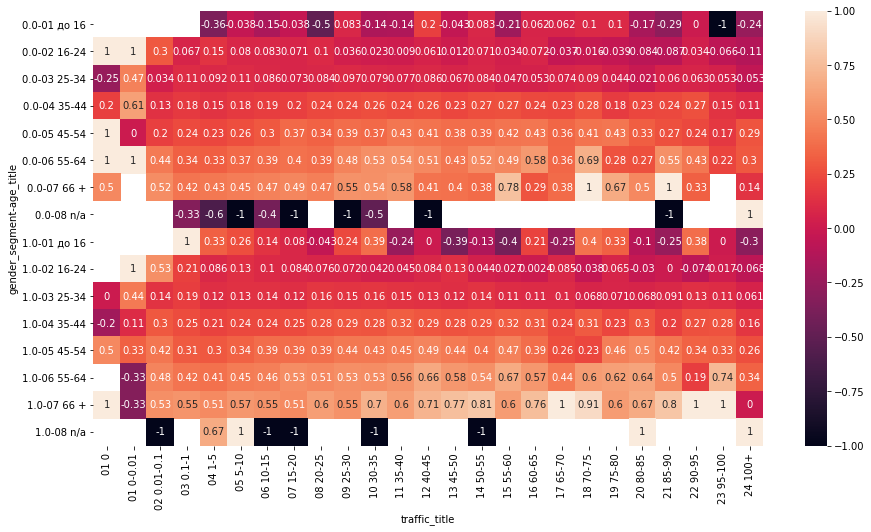

In [23]:
# Код ревьюера
import seaborn as sns
import matplotlib.pyplot as plt
d = df.assign(total_nps=lambda row: row['nps_group'].map({'promoters': 1, 'passives': 0, 'detractors': -1}))\
  .pivot_table(index=['gender_segment', 'age_title'], columns=['traffic_title'], values='total_nps', aggfunc='mean')
display(d)
plt.figure(figsize=(15,8))
sns.heatmap(d, annot=True);